In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor as gbR
from xgboost import XGBRegressor as xgbR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [33]:
#loading the data
station1 = pd.read_csv('./Data/station_03216070_merged.csv')
station2 = pd.read_csv('./Data/station_03303280_merged.csv')
station3 = pd.read_csv('./Data/station_03612600_merged.csv')

# station1['datetime'] = pd.to_datetime(station1['datetime']) 
# station1['year']= station1['datetime'].dt.year
# station1['month']= station1['datetime'].dt.month
# station1['day']= station1['datetime'].dt.day

In [34]:
features = ['datetime','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12','Turbidity (FNU)']
# features = ['year','month','day','B1', 'B2', 'B3', 'B4', 'B5', 'B8', 'B12','Turbidity (FNU)']
target = 'Turbidity (FNU)'

In [35]:
station1 = station1[features].reset_index(drop=True).dropna()
station2 = station2[features].reset_index(drop=True).dropna()
station3 = station3[features].reset_index(drop=True).dropna()

In [39]:
station1['datetime'] = pd.to_datetime(station1['datetime']) 
station1['date']= station1['datetime'].dt.date

In [57]:
station1.describe().round()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidity (FNU)
count,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0
mean,2170.0,2093.0,2179.0,2172.0,2530.0,3212.0,3426.0,3170.0,3547.0,4056.0,2676.0,2093.0,31.0
std,2891.0,2816.0,2586.0,2489.0,2439.0,2141.0,2072.0,2242.0,1993.0,3074.0,1377.0,1320.0,45.0
min,102.0,139.0,361.0,344.0,400.0,485.0,515.0,470.0,593.0,566.0,329.0,249.0,1.0
25%,548.0,502.0,727.0,785.0,1167.0,1938.0,2073.0,1844.0,2275.0,2434.0,1918.0,1313.0,9.0
50%,826.0,768.0,960.0,948.0,1390.0,2540.0,2850.0,2412.0,2997.0,2963.0,2194.0,1555.0,15.0
75%,2104.0,1980.0,2063.0,2148.0,2456.0,3522.0,3824.0,3333.0,3929.0,3918.0,3020.0,2368.0,34.0
max,15121.0,14280.0,12464.0,12104.0,12629.0,12331.0,12166.0,12288.0,12010.0,16878.0,9169.0,8381.0,381.0


In [61]:
station1.corr().round(2)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidity (FNU)
B1,1.00,0.99,0.99,0.98,0.98,0.96,0.94,0.95,0.93,0.88,0.82,0.85,0.04
B2,0.99,1.00,1.00,0.99,0.99,0.96,0.95,0.97,0.93,0.87,0.84,0.86,0.04
B3,0.99,1.00,1.00,1.00,1.00,0.97,0.96,0.98,0.95,0.87,0.85,0.87,0.05
B4,0.98,0.99,1.00,1.00,1.00,0.97,0.95,0.98,0.95,0.86,0.84,0.88,0.07
B5,0.98,0.99,1.00,1.00,1.00,0.98,0.96,0.98,0.96,0.87,0.86,0.88,0.06
B6,0.96,0.96,0.97,0.97,0.98,1.00,1.00,0.99,0.99,0.87,0.86,0.87,0.02
B7,0.94,0.95,0.96,0.95,0.96,1.00,1.00,0.98,1.00,0.87,0.86,0.87,0.01
B8,0.95,0.97,0.98,0.98,0.98,0.99,0.98,1.00,0.97,0.86,0.86,0.87,0.05
B8A,0.93,0.93,0.95,0.95,0.96,0.99,1.00,0.97,1.00,0.86,0.86,0.86,0.00
B9,0.88,0.87,0.87,0.86,0.87,0.87,0.87,0.86,0.86,1.00,0.82,0.84,0.02


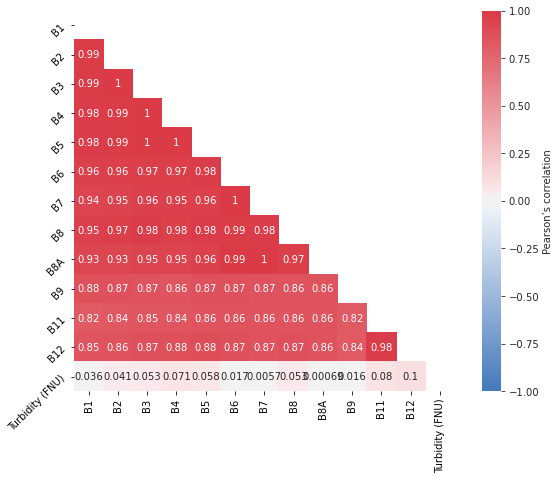

In [51]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 7))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
mask = np.zeros_like(station1.drop(['datetime', 'date'], axis=1).corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(station1.drop(['datetime', 'date'], axis=1).corr(), mask=mask,cmap=cmap, vmin=-1.0,vmax=1.0,
                ax=ax, square=True, annot = True,cbar_kws={'label': 'Pearson’s correlation'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

Feature ranking:
1. feature B6 = 0.104055
2. feature B4 = 0.091004
3. feature B5 = 0.083185
4. feature B7 = 0.082943
5. feature B8 = 0.067842
6. feature B8A = 0.063211
7. feature B11 = 0.061736
8. feature B9 = 0.060369
9. feature B3 = 0.057720
10. feature B2 = 0.040472
11. feature B12 = 0.039087
12. feature B1 = 0.000000


(-1.0, 12.0)

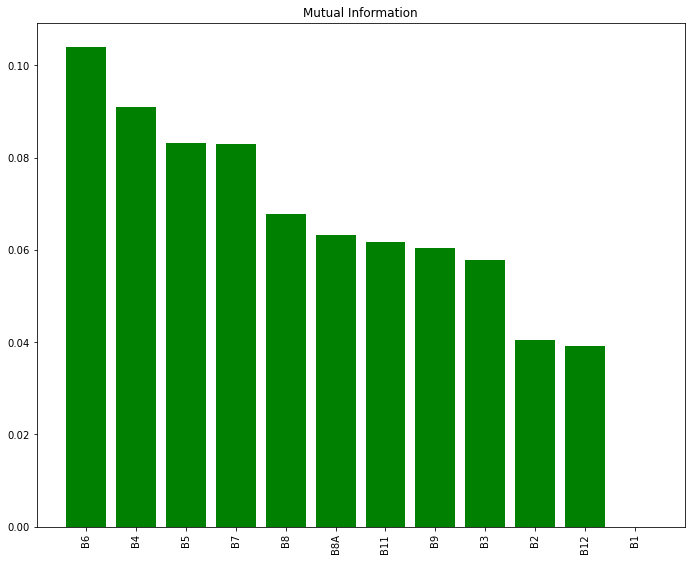

In [52]:
X = station1.drop([target], axis=1)._get_numeric_data()   # separate DataFrames for predictor and response features
y = station1.loc[:,[target]]._get_numeric_data()

mi = mutual_info_regression(X,np.ravel(y), random_state=20) # calculate mutual information
# mi /= np.max(mi)                          # calculate relative mutual information

indices = np.argsort(mi)[::-1]            # find indicies for descending order

print("Feature ranking:")                 # write out the feature importances
for f in range(X.shape[1]):
    print("%d. feature %s = %f" % (f + 1, X.columns[indices][f], mi[indices[f]]))

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9, 7))
fig.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1., wspace=0.2, hspace=0.2)

ax.bar(range(X.shape[1]), mi[indices],color="g", align="center")
ax.set_title("Mutual Information")
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels(X.columns[indices],rotation=90)
ax.set_xlim([-1, X.shape[1]])

## Strategy 1

In [126]:
train_size = int(len(station1)*0.7)

X_train, X_test = station1.drop([target, 'datetime','B1','B8A', 'date'],axis=1)[0:train_size], station1.drop([target, 'datetime','B1','B8A', 'date'],axis=1)[train_size:]
y_train, y_test = station1[[target]][0:train_size], station1[[target]][train_size:]

In [127]:
#naive ML model
model = gbR()

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test,y_test_pred)))

Model Report
The training R2 is : 0.9762
The testing R2 is : -0.2105
The training MSE is : 32.61
The testing MSE is : 4152


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
hyper_parameters =  {"min_samples_split" : [4,5,6,7,8],
                     "min_samples_leaf": [4,5,7,9,11],
                     "max_depth"        : range(6,12,1),
                    "learning_rate": np.logspace(-3,-1,3),
                    "n_estimators"    : range(100,500,50)
                    }

In [151]:
model = GridSearchCV(estimator = gbR(random_state=42),
                     param_grid = hyper_parameters,
                     scoring='neg_mean_squared_error',n_jobs=-1, cv=2, verbose = 2)

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

#Print model report:
print("Model Report")
print("-------------------------------")
print("CV best parameter combinations : {}".format(model.best_params_))
print("-------------------------------")
print("-------------------------------")
train_r2 = metrics.r2_score(y_train, y_train_pred)
print("The training R2 score : {0:.4g}".format(train_r2))
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("The testing R2 score is : {0:.4g}".format(test_r2))
print("CV best score : {0:.4g}".format(model.best_score_))
print("-------------------------------")
print("-------------------------------")
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
print("The training MSE score : {0:.4g}".format(train_mse))
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print("The testing MSE score is : {0:.4g}".format(test_mse))
print("-------------------------------")
print("-------------------------------")
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("The training MAE score : {0:.4g}".format(train_mae))
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print("The testing MAE score is : {0:.4g}".format(test_mae))

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Report
-------------------------------
CV best parameter combinations : {'learning_rate': 0.01, 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 150}
-------------------------------
-------------------------------
The training R2 score : 0.5191
The testing R2 score is : 0.004398
CV best score : -1352
-------------------------------
-------------------------------
The training MSE score : 693.5
The testing MSE score is : 3247
-------------------------------
-------------------------------
The training MAE score : 13.24
The testing MAE score is : 38.94


___

## Strategy 2

In [152]:
train = station1.drop(['datetime','B1','B8A', 'date'],axis=1).reset_index(drop=True)
test = pd.DataFrame()
for i in range(5,len(station1),5):
    test = pd.concat([test,station1.drop(['datetime','B1','B8A', 'date'],axis=1).iloc[[i]]], ignore_index = False)
    train.drop([i], inplace=True)

X_train, X_test = train.drop([target],axis=1), test.drop([target],axis=1)
y_train, y_test = train[[target]], test[[target]]

In [138]:
#naive ML model

model = gbR()

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test,y_test_pred)))

Model Report
The training R2 is : 0.9572
The testing R2 is : 0.3381
The training MSE is : 95.23
The testing MSE is : 863.8


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
hyper_parameters =  {"min_samples_split" : [4,5,6,7,8],
                     "min_samples_leaf": [4,5,7,9,11],
                     "max_depth"        : range(6,12,1),
                    "learning_rate": np.logspace(-3,-1,3),
                    "n_estimators"    : range(100,500,50)
                    }

model = GridSearchCV(estimator = gbR(random_state=42),
                     param_grid = hyper_parameters,
                     scoring='neg_mean_squared_error',n_jobs=-1, cv=2, verbose = 2)

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

#Print model report:
print("Model Report")
print("-------------------------------")
print("CV best parameter combinations : {}".format(model.best_params_))
print("-------------------------------")
print("-------------------------------")
train_r2 = metrics.r2_score(y_train, y_train_pred)
print("The training R2 score : {0:.4g}".format(train_r2))
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("The testing R2 score is : {0:.4g}".format(test_r2))
print("CV best score : {0:.4g}".format(model.best_score_))
print("-------------------------------")
print("-------------------------------")
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
print("The training MSE score : {0:.4g}".format(train_mse))
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print("The testing MSE score is : {0:.4g}".format(test_mse))
print("-------------------------------")
print("-------------------------------")
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("The training MAE score : {0:.4g}".format(train_mae))
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print("The testing MAE score is : {0:.4g}".format(test_mae))

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits
Model Report
-------------------------------
CV best parameter combinations : {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 100}
-------------------------------
-------------------------------
The training R2 score : 0.3606
The testing R2 score is : 0.1431
CV best score : -2204
-------------------------------
-------------------------------
The training MSE score : 1421
The testing MSE score is : 1118
-------------------------------
-------------------------------
The training MAE score : 19.74
The testing MAE score is : 22.75


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Strategy 3

In [154]:
X = station1.drop(['datetime','B1','B8A', 'date',target], axis=1)
y = station1.loc[:,[target]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [142]:
#naive ML model

model = gbR()

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test,y_test_pred)))

Model Report
The training R2 is : 0.9623
The testing R2 is : 0.1082
The training MSE is : 58.97
The testing MSE is : 2781


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
hyper_parameters =  {"min_samples_split" : [4,5,6,7,8],
                     "min_samples_leaf": [4,5,7,9,11],
                     "max_depth"        : range(6,12,1),
                    "learning_rate": np.logspace(-3,-1,3),
                    "n_estimators"    : range(100,500,50)
                    }

model = GridSearchCV(estimator = gbR(random_state=42),
                     param_grid = hyper_parameters,
                     scoring='neg_mean_squared_error',n_jobs=-1, cv=2, verbose = 2)

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

#Print model report:
print("Model Report")
print("-------------------------------")
print("CV best parameter combinations : {}".format(model.best_params_))
print("-------------------------------")
print("-------------------------------")
train_r2 = metrics.r2_score(y_train, y_train_pred)
print("The training R2 score : {0:.4g}".format(train_r2))
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("The testing R2 score is : {0:.4g}".format(test_r2))
print("CV best score : {0:.4g}".format(model.best_score_))
print("-------------------------------")
print("-------------------------------")
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
print("The training MSE score : {0:.4g}".format(train_mse))
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print("The testing MSE score is : {0:.4g}".format(test_mse))
print("-------------------------------")
print("-------------------------------")
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("The training MAE score : {0:.4g}".format(train_mae))
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print("The testing MAE score is : {0:.4g}".format(test_mae))

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Report
-------------------------------
CV best parameter combinations : {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 400}
-------------------------------
-------------------------------
The training R2 score : 0.8805
The testing R2 score is : -0.02868
CV best score : -1295
-------------------------------
-------------------------------
The training MSE score : 187
The testing MSE score is : 3208
-------------------------------
-------------------------------
The training MAE score : 6.552
The testing MAE score is : 28.57


## Strategy 4

In [143]:
bands = ['B2', 'B3', 'B4', 'B5','B6','B7', 'B8', 'B12']
# df_shifted = station1.copy()

df_shifted = station1.drop(['datetime','B1','B8A', 'B9','B11','date'], axis=1)
for i in bands:
    for t in range(1,4):
        df_shifted[i+'-'+str(t)] = df_shifted[i].shift(t)
df_shifted.dropna(inplace=True)

In [144]:
df_shifted

,B2,B3,B4,B5,B6,B7,B8,B12,Turbidity (FNU),B2-1,...,B6-3,B7-1,B7-2,B7-3,B8-1,B8-2,B8-3,B12-1,B12-2,B12-3
3,1764.0,2060.0,2204.0,2259.0,2359.0,2448.0,2414.0,2380.0,26.4,390.0,...,1162.0,1528.0,1491.0,1209.0,1832.0,1600.0,1236.0,1171.0,1457.0,1117.0
4,678.0,933.0,1178.0,1469.0,1542.0,1742.0,1516.0,997.0,82.4,1764.0,...,1411.0,2448.0,1528.0,1491.0,2414.0,1832.0,1600.0,2380.0,1171.0,1457.0
5,1466.0,1702.0,2114.0,2267.0,2463.0,2569.0,2684.0,2708.0,83.4,678.0,...,1423.0,1742.0,2448.0,1528.0,1516.0,2414.0,1832.0,997.0,2380.0,1171.0
6,1978.0,2050.0,2446.0,2967.0,3279.0,3324.0,3780.0,1556.0,55.2,1466.0,...,2359.0,2569.0,1742.0,2448.0,2684.0,1516.0,2414.0,2708.0,997.0,2380.0
7,220.0,489.0,655.0,912.0,1219.0,1295.0,973.0,1172.0,21.9,1978.0,...,1542.0,3324.0,2569.0,1742.0,3780.0,2684.0,1516.0,1556.0,2708.0,997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,9080.0,8488.0,8176.0,8436.0,8097.0,7953.0,7976.0,5742.0,23.0,7644.0,...,4642.0,6600.0,3618.0,5168.0,7276.0,2923.0,4248.0,3428.0,2202.0,4179.0
281,1550.0,1689.0,1778.0,2198.0,2984.0,3172.0,2560.0,2367.0,13.0,9080.0,...,3160.0,7953.0,6600.0,3618.0,7976.0,7276.0,2923.0,5742.0,3428.0,2202.0
282,6484.0,5792.0,5352.0,5363.0,5220.0,5290.0,5200.0,1735.0,33.0,1550.0,...,6518.0,3172.0,7953.0,6600.0,2560.0,7976.0,7276.0,2367.0,5742.0,3428.0
283,1581.0,1670.0,1810.0,2237.0,3019.0,3381.0,2616.0,2393.0,21.0,6484.0,...,8097.0,5290.0,3172.0,7953.0,5200.0,2560.0,7976.0,1735.0,2367.0,5742.0


In [156]:
train_size = int(len(station1)*0.7)

X_train, X_test = df_shifted.drop([target],axis=1)[0:train_size], df_shifted.drop([target],axis=1)[train_size:]
y_train, y_test = df_shifted[[target]][0:train_size], df_shifted[[target]][train_size:]

In [148]:
#naive ML model

model = gbR()

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test,y_test_pred)))

Model Report
The training R2 is : 0.9865
The testing R2 is : -0.2679
The training MSE is : 19.42
The testing MSE is : 4134


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
hyper_parameters =  {"min_samples_split" : [4,5,6,7,8],
                     "min_samples_leaf": [4,5,7,9,11],
                     "max_depth"        : range(6,12,1),
                    "learning_rate": np.logspace(-3,-1,3),
                    "n_estimators"    : range(100,500,50)
                    }

model = GridSearchCV(estimator = gbR(random_state=42),
                     param_grid = hyper_parameters,
                     scoring='neg_mean_squared_error',n_jobs=-1, cv=2, verbose = 2)

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

#Print model report:
print("Model Report")
print("-------------------------------")
print("CV best parameter combinations : {}".format(model.best_params_))
print("-------------------------------")
print("-------------------------------")
train_r2 = metrics.r2_score(y_train, y_train_pred)
print("The training R2 score : {0:.4g}".format(train_r2))
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("The testing R2 score is : {0:.4g}".format(test_r2))
print("CV best score : {0:.4g}".format(model.best_score_))
print("-------------------------------")
print("-------------------------------")
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
print("The training MSE score : {0:.4g}".format(train_mse))
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print("The testing MSE score is : {0:.4g}".format(test_mse))
print("-------------------------------")
print("-------------------------------")
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("The training MAE score : {0:.4g}".format(train_mae))
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print("The testing MAE score is : {0:.4g}".format(test_mae))

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits


C:\Users\tmo0005\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Report
-------------------------------
CV best parameter combinations : {'learning_rate': 0.01, 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 150}
-------------------------------
-------------------------------
The training R2 score : 0.5191
The testing R2 score is : 0.004398
CV best score : -1352
-------------------------------
-------------------------------
The training MSE score : 693.5
The testing MSE score is : 3247
-------------------------------
-------------------------------
The training MAE score : 13.24
The testing MAE score is : 38.94


___

In [124]:
train = df_shifted.reset_index(drop=True)
test = pd.DataFrame()
for i in range(5,len(df_shifted),5):
    test = pd.concat([test,df_shifted.iloc[[i]]], ignore_index = False)
    train.drop([i], inplace=True)

X_train, X_test = train.drop([target],axis=1), test.drop([target],axis=1)
y_train, y_test = train[[target]], test[[target]]

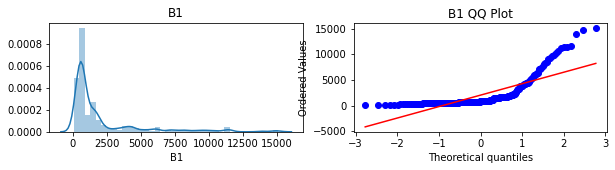

In [65]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df1.B1)
plt.title('B1')
plt.subplot(122)
stats.probplot(df1.B1, dist="norm", plot=plt)
plt.title('B1 QQ Plot')
plt.show()

In [107]:
sc = StandardScaler()
df_sc = sc.fit_transform(station1[[target]])

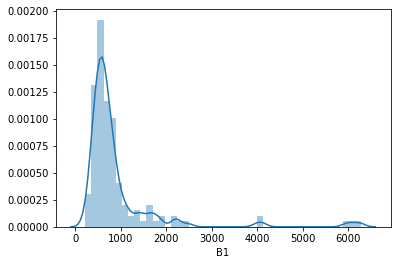

In [105]:
sns.distplot(X_train.iloc[:,0])

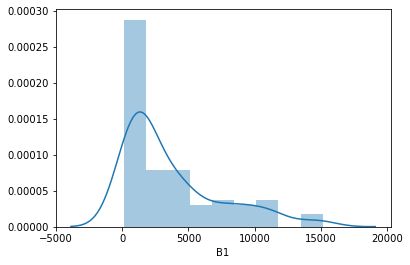

In [106]:
sns.distplot(X_test.iloc[:,0])

In [107]:
trf = FunctionTransformer(func=np.log1p)
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

y_train = trf.fit_transform(y_train)
y_test = trf.transform(y_test) 

In [142]:
pt = PowerTransformer(method='box-cox')
X_train = pt.fit_transform(X_train+0.0000001)
X_test = pt.transform(X_test+0.0000001)

y_train = pt.fit_transform(y_train+0.0000001)
y_test = pt.transform(y_test+0.0000001)


In [179]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [237]:
hyper_parameters =  {"min_samples_split" : [4,5,6,7,8],
                     "min_samples_leaf": [4,5,7,9,11],
                     "max_depth"        : range(6,12,1),
                    "learning_rate": np.logspace(-3,-1,3)}
#                     "n_estimators"    : range(100,500,50)
#                     }

In [238]:
model = GridSearchCV(estimator = gbR(random_state=42),
                     param_grid = hyper_parameters,
                     scoring='r2',n_jobs=-1, cv=2, verbose = 1)

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

#Print model report:
print("Model Report")
print("-------------------------------")
print("CV best parameter combinations : {}".format(model.best_params_))
print("-------------------------------")
print("-------------------------------")
train_r2 = metrics.r2_score(y_train, y_train_pred)
print("The training R2 score : {0:.4g}".format(train_r2))
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("The testing R2 score is : {0:.4g}".format(test_r2))
print("CV best score : {0:.4g}".format(model.best_score_))
print("-------------------------------")
print("-------------------------------")
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
print("The training MSE score : {0:.4g}".format(train_mse))
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print("The testing MSE score is : {0:.4g}".format(test_mse))
print("-------------------------------")
print("-------------------------------")
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("The training MAE score : {0:.4g}".format(train_mae))
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print("The testing MAE score is : {0:.4g}".format(test_mae))

Fitting 2 folds for each of 450 candidates, totalling 900 fits
Model Report
-------------------------------
CV best parameter combinations : {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 4}
-------------------------------
-------------------------------
The training R2 score : 0.9916
The testing R2 score is : -0.1355
CV best score : 0.3434
-------------------------------
-------------------------------
The training MSE score : 0.019
The testing MSE score is : 2.724
-------------------------------
-------------------------------
The training MAE score : 0.08028
The testing MAE score is : 1.172


Text(0.5, 0, 'Feature Importance Score')

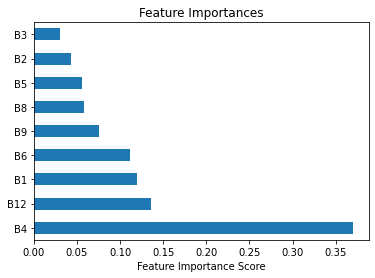

In [114]:
feat_imp = pd.Series(model.best_estimator_.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [236]:
#naive ML model

model = gbR()

#Fit the model on the data
model.fit(X_train, y_train)

#Predict training set:
y_train_pred = model.predict(X_train)

#Predict testing set:
y_test_pred = model.predict(X_test)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test,y_test_pred)))

Model Report
The training R2 is : 0.9898
The testing R2 is : 0.2746
The training MSE is : 0.02308
The testing MSE is : 1.74


In [ ]:
model = SVR()

#Fit the model on the data
model.fit(X_train.values, y_train.values.ravel())

#Predict training set:
y_train_pred = model.predict(X_train.values)

#Predict testing set:
y_test_pred = model.predict(X_test.values)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train.values, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test.values,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test.values,y_test_pred)))

In [117]:
model = MLPRegressor()

#Fit the model on the data
model.fit(X_train.values, y_train.values.ravel())

#Predict training set:
y_train_pred = model.predict(X_train.values)

#Predict testing set:
y_test_pred = model.predict(X_test.values)

print("Model Report")
print("The training R2 is : {0:.4g}".format(metrics.r2_score(y_train.values, y_train_pred)))
print("The testing R2 is : {0:.4g}".format(metrics.r2_score(y_test.values,y_test_pred)))

print("The training MSE is : {0:.4g}".format(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("The testing MSE is : {0:.4g}".format(metrics.mean_squared_error(y_test.values,y_test_pred)))

Model Report
The training R2 is : -1.371
The testing R2 is : -2.362
The training MSE is : 2.349
The testing MSE is : 2.975
